# Cross Validation

Splitting our datasetes into train/test sets allows us to test our model on unseen examples. However, it might be the case that we got a lucky (or unlucky) split that doesn't represent the model's actual performance. To solve this problem, we'll use a technique called cross-validation, where we use the entire dataset for training and for testing and evaluate the model accordingly.

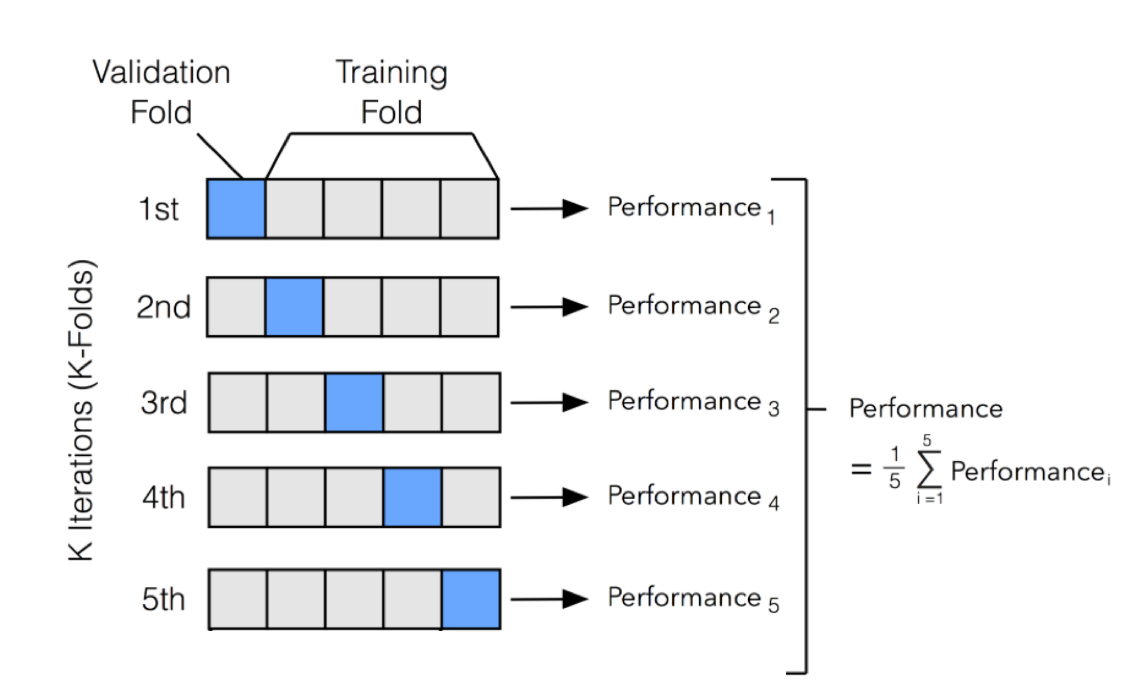

There are several ways of performing cross-validation, and there are several corresponding iterators defined in scikit-learn. Each defines a `split` method, which will generate arrays of indices from the data set, each array indicating the instances to go into the training or testing set. 


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics, model_selection

In [2]:
x, y = datasets.load_breast_cancer(return_X_y=True)

In [3]:
# Define a function to split our dataset into train/test splits using indices

def kfold_train_test_split(x, y, train_indices, test_indices):
  return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

### `KFold`

`KFold` is arguably the simplest. It partitions the data into $k$ folds. It does not attempt to keep the proportions of classes. 


In [4]:
k_fold = model_selection.KFold(n_splits=10) # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty array to store the scores
scores = [] 

for train_indices, test_indices in k_fold.split(x):
  # Tplit data using our predefined function
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

  # Train model
  svc = svm.SVC()
  svc.fit(x_train, y_train)

  # Predict using test set
  y_pred = svc.predict(x_test)

  # Calculate scores
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  # Create scores dictionary
  scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall}

  # Append to scores array
  scores.append(scores_dict)

In [5]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(scores)
scores_df

accuracy  precision    recall
0  0.701754   0.392857  1.000000
1  0.912281   0.875000  1.000000
2  0.912281   0.918919  0.944444
3  0.894737   0.828571  1.000000
4  0.964912   0.935484  1.000000
5  0.982456   0.978261  1.000000
6  0.947368   0.952381  0.975610
7  0.947368   0.955556  0.977273
8  0.912281   0.953488  0.931818
9  0.982143   0.977273  1.000000

In [6]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.915758
precision    0.876779
recall       0.982915
dtype: float64

### `StratifiedKFold`

`StratifiedKFold` ensures that the proportion of classes are preserved in each training/testing set. 

In [7]:
stratified_k_fold = model_selection.StratifiedKFold(n_splits=10) # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty array to store the scores
scores = [] 

for train_indices, test_indices in stratified_k_fold.split(x, y): # y is needed here for stratification, similar to stratify = y. 
  # Tplit data using our predefined function
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

  # Train model
  svc = svm.SVC()
  svc.fit(x_train, y_train)

  # Predict using test set
  y_pred = svc.predict(x_test)

  # Calculate scores
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  # Create scores dictionary
  scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall}

  # Append to scores array
  scores.append(scores_dict)

In [8]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(scores)
scores_df

accuracy  precision    recall
0  0.894737   0.853659  1.000000
1  0.842105   0.809524  0.971429
2  0.894737   0.894737  0.944444
3  0.929825   0.900000  1.000000
4  0.929825   0.900000  1.000000
5  0.929825   0.921053  0.972222
6  0.947368   0.945946  0.972222
7  0.929825   0.921053  0.972222
8  0.929825   0.944444  0.944444
9  0.910714   0.875000  1.000000

In [9]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.913878
precision    0.896541
recall       0.977698
dtype: float64

### `ShuffleSplit`

`ShuffleSplit` will generate indepedent pairs of randomly shuffled training and testing sets.  

In [10]:
shuffle_k_fold = model_selection.ShuffleSplit(n_splits=10, random_state=42) # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty array to store the scores
scores = [] 

for train_indices, test_indices in shuffle_k_fold.split(x): 
  # Tplit data using our predefined function
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

  # Train model
  svc = svm.SVC()
  svc.fit(x_train, y_train)

  # Predict using test set
  y_pred = svc.predict(x_test)

  # Calculate scores
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  # Create scores dictionary
  scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall}

  # Append to scores array
  scores.append(scores_dict)

In [11]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(scores)
scores_df

accuracy  precision    recall
0  0.982456   0.975610  1.000000
1  0.894737   0.857143  1.000000
2  0.912281   0.868421  1.000000
3  0.842105   0.857143  0.923077
4  0.894737   0.860465  1.000000
5  0.947368   0.918919  1.000000
6  0.912281   0.894737  0.971429
7  0.947368   0.928571  1.000000
8  0.947368   0.944444  0.971429
9  0.894737   0.853659  1.000000

In [12]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.917544
precision    0.895911
recall       0.986593
dtype: float64

### `StratifiedShuffleSplit`

`StratifiedShuffleSplit` will generate indepedent pairs of shuffled training and testing sets. Here, however, it will ensure the training and test sets are stratified.   

In [13]:
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10) # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty array to store the scores
scores = [] 

for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y): # y is needed here for stratification, similar to stratify = y. 
  # Tplit data using our predefined function
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

  # Train model
  svc = svm.SVC()
  svc.fit(x_train, y_train)

  # Predict using test set
  y_pred = svc.predict(x_test)

  # Calculate scores
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  # Create scores dictionary
  scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall}

  # Append to scores array
  scores.append(scores_dict)

In [14]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(scores)
scores_df

accuracy  precision    recall
0  0.929825   0.944444  0.944444
1  0.947368   0.945946  0.972222
2  0.912281   0.878049  1.000000
3  0.929825   0.921053  0.972222
4  0.912281   0.897436  0.972222
5  0.947368   0.945946  0.972222
6  0.894737   0.857143  1.000000
7  0.964912   0.947368  1.000000
8  0.964912   0.947368  1.000000
9  0.894737   0.857143  1.000000

In [15]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.929825
precision    0.914190
recall       0.983333
dtype: float64